In [91]:

from sklearn.datasets import make_regression

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [93]:

from sklearn.linear_model import Lasso

In [94]:
x,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

In [95]:
from sklearn.model_selection  import train_test_split

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
lr=LinearRegression()

In [99]:

lr.fit(x_train,y_train)

LinearRegression()

In [100]:
lr.coef_

array([27.98421819])

In [101]:
lr.intercept_

-3.3664305548618767

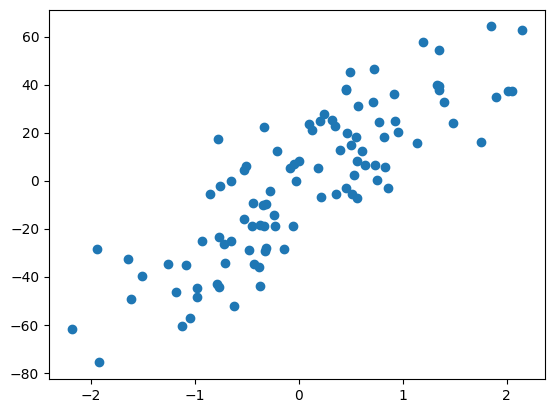

In [102]:
plt.scatter(x,y)

C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider i

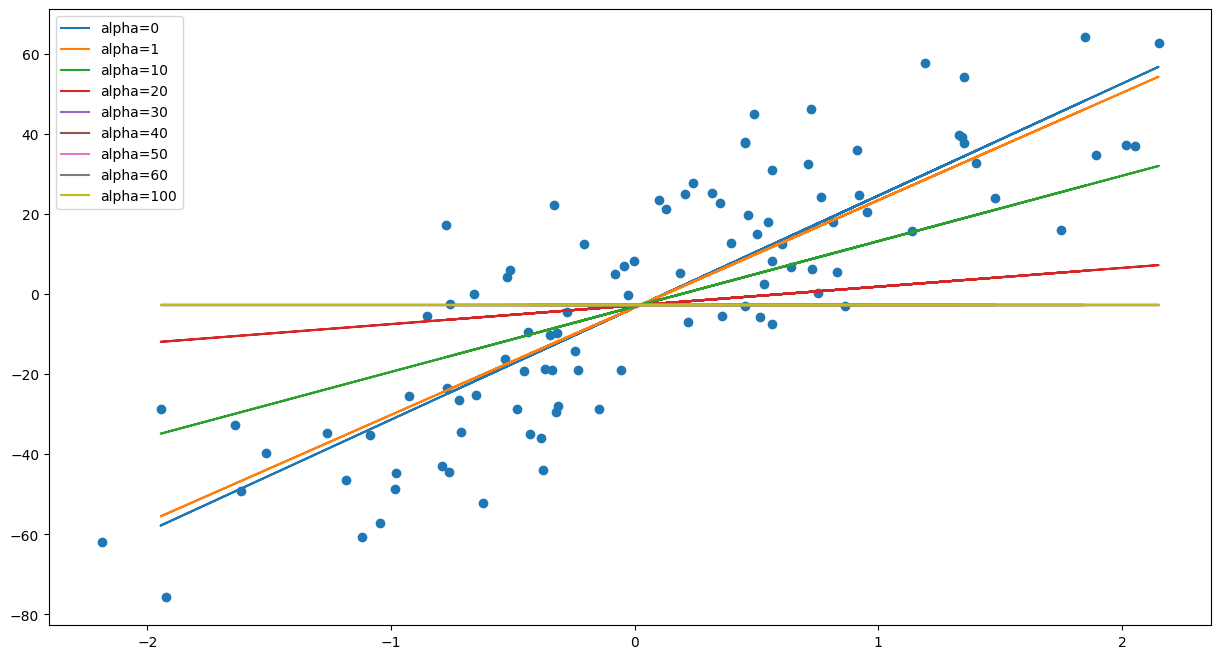

In [110]:
alpha=[0,1,10,20,30,40,50,60,100]

plt.figure(figsize=(15,8))
plt.scatter(x,y)


for i in alpha:
    reg=Lasso(alpha=i) 
    reg.fit(x_train,y_train) 
    y_pred=reg.predict(x_test)
    plt.plot(x_test,reg.predict(x_test),label='alpha={}'.format(i))
plt.legend()
plt.show()    

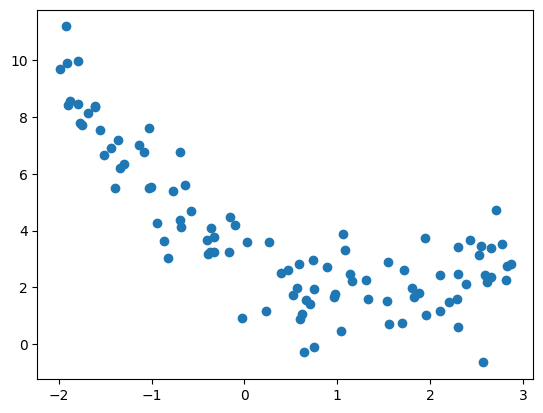

In [111]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider i

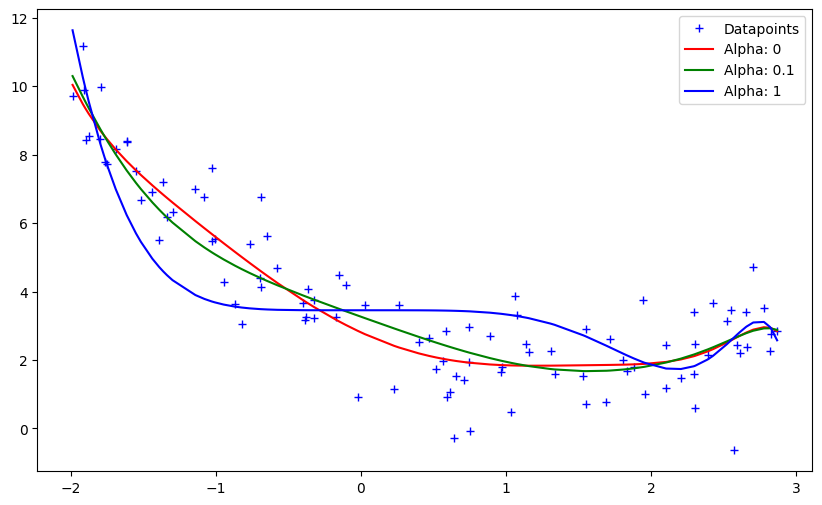

In [112]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', Lasso(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 0.1, 1]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()   
plt.show()    